## Week 4: bank_test
Name: Deirdre Matthews
Student ID: 18236537

This Notebook is a practice of for MCQ


## A. Import Pyton Modules and Dataset

In [45]:
# Import 
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
%matplotlib inline
#the following are required if running thru' Google Colaboratory
#from google.colab import drive
#drive.mount('/content/drive')

# Import bank.csv into the Pandas Dataframe
df = pd.read_csv("./bank_test.csv")
#df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/bank.csv') #use this from Google Colaboratory
df.head(10)

,age,job,education,balance,loan,contact,subscribed
0,32.0,technician,tertiary,392,no,cellular,no
1,39.0,technician,secondary,688,yes,cellular,no
2,59.0,retired,secondary,1035,yes,cellular,no
3,47.0,blue-collar,secondary,398,yes,cellular,no
4,54.0,retired,secondary,1004,no,cellular,no
5,46.0,self-employed,tertiary,926,no,cellular,no
6,34.0,blue-collar,secondary,1924,yes,cellular,no
7,45.0,services,secondary,396,yes,cellular,no
8,58.0,management,tertiary,315,no,cellular,no
9,49.0,management,tertiary,20727,no,cellular,no


## Q1

In [46]:
# job frequency table 
frequency_table = df['job'].value_counts(ascending=False)
print('Frequency Table for Job') 
print(frequency_table)
print('Total records = {}'.format(df['job'].count()))

Frequency Table for Job
management       461
technician       348
blue-collar      298
admin.           247
services         165
retired          162
student           96
unemployed        69
self-employed     64
entrepreneur      45
housemaid         35
Name: job, dtype: int64
Total records = 1990


Ans: Students = 96

# Q2

In [47]:
# statistics - numeric data
df.describe()

,age,balance
count,1988.000000,2000.000000
mean,41.753018,1413.663500
std,12.724358,3131.224213
min,18.000000,-980.000000
25%,32.000000,201.500000
50%,38.000000,551.000000
75%,50.000000,1644.500000
max,93.000000,81204.000000


In [48]:
# display the median age value
df['age'].median()

38.0

Q2. median age = 38.0

# Q3 & Q4

In [49]:
# Check for missing values
df.isna().sum()

age            12
job            10
education     104
balance         0
loan            0
contact       191
subscribed      0
dtype: int64

Q3. Missing values job = 10

Q4. Missing values balance = 0

# Q5

In [ ]:
# Check for Outliers
# histogram for balance 
df['balance'].hist(bins=50)
plt.title('HISTOGRAM - BALANCE')
plt.xlabel('Balance')
plt.ylabel('Number of Contacts')
plt.show()

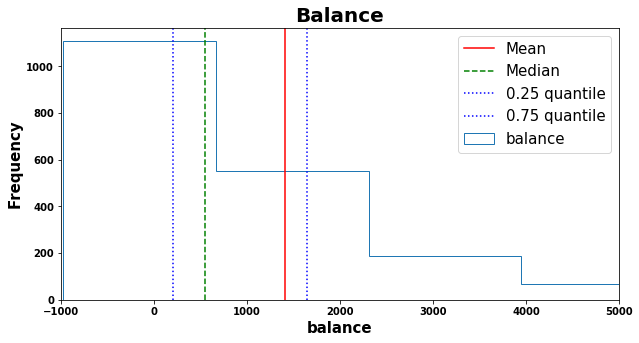

In [67]:
# Plot histogram

plt.figure(figsize=(10,5))
df.balance.plot(kind='hist',histtype='step',bins=50)
plt.axvline(df.balance.mean(),c='red',label = 'Mean')
plt.axvline(df.balance.median(),c='green',linestyle='--',label = 'Median')
plt.axvline(df.balance.quantile(0.25),c='blue',linestyle=':',label = '0.25 quantile')
plt.axvline(df.balance.quantile(0.75),c='blue',linestyle=':',label = '0.75 quantile')
plt.axis(xmin=-1000,xmax=5000)
plt.title('Balance',fontweight="bold",fontsize = 20)
plt.xlabel('balance',fontweight="bold",fontsize = 15)
plt.ylabel('Frequency',fontweight="bold",fontsize = 15)
plt.xticks(fontweight="bold",fontsize = 10)
plt.yticks(fontweight="bold",fontsize = 10)
plt.legend(loc=1, prop={'size': 15})
plt.show()

In [51]:
# outlier max
df['balance'].max()


81204

In [52]:
# outlier mmin
df['balance'].min()

-980

Q5. 81,204

# Q6

In [53]:
# create df where customer has no loan

noloandf = df[(df['loan']  == 'no')]
noloandf.sort_values (by='age', ascending=False)

,age,job,education,balance,loan,contact,subscribed
1370,93.0,retired,NaN,775,no,cellular,yes
1182,93.0,retired,NaN,775,no,cellular,yes
1074,86.0,retired,primary,5236,no,telephone,yes
1352,86.0,retired,primary,1255,no,telephone,yes
1721,84.0,retired,primary,639,no,telephone,yes
...,...,...,...,...,...,...,...
744,NaN,management,tertiary,-61,no,cellular,no
795,NaN,technician,tertiary,992,no,cellular,no
1171,NaN,retired,tertiary,2812,no,cellular,yes
1232,NaN,student,secondary,431,no,cellular,yes


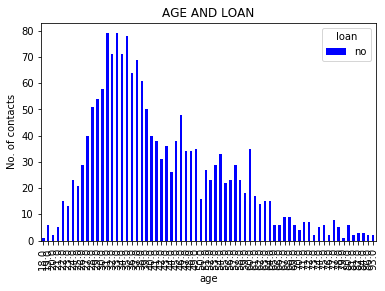

In [54]:
#loan and age
crosstab_MS = pd.crosstab(noloandf['age'], noloandf['loan'])
crosstab_MS.plot(kind='bar', stacked=True, color=['blue', 'orange'], title = 'AGE AND LOAN')
plt.ylabel('No. of contacts')
plt.show()

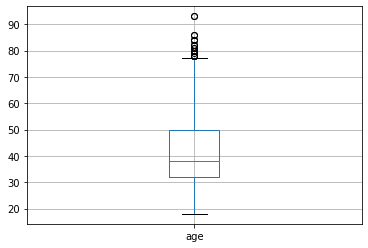

In [55]:
boxplot = noloandf.boxplot(column=['age'])
plt.show()

Q6 Among customers who do not have a loan, any age above 78 is an outlier

# Q7

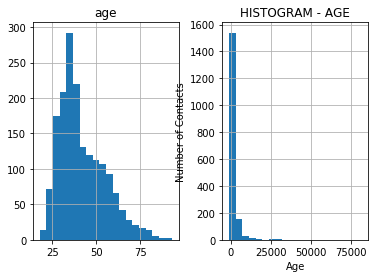

In [56]:
# Check for Outliers
# histogram for age 
noloandf.hist(bins=20)
plt.title('HISTOGRAM - AGE')
plt.xlabel('Age')
plt.ylabel('Number of Contacts')
plt.show()

In [57]:
#selects data by and sorts descending
subscribeddf = df[(df['subscribed']  == 'yes')]
subscribeddf.sort_values (by='balance', ascending=False)

,age,job,education,balance,loan,contact,subscribed
1033,84.0,retired,secondary,81204,no,telephone,yes
1422,45.0,management,tertiary,31472,no,cellular,yes
1551,77.0,retired,primary,29340,no,cellular,yes
1471,74.0,retired,primary,29080,no,cellular,yes
1657,42.0,management,tertiary,27696,no,cellular,yes
...,...,...,...,...,...,...,...
1472,28.0,blue-collar,secondary,-46,no,cellular,yes
1905,28.0,blue-collar,secondary,-46,no,cellular,yes
1007,27.0,technician,tertiary,-67,no,cellular,yes
1024,36.0,management,tertiary,-115,no,cellular,yes


Q7. No subscribed customer has a balance above 81,204

# Q8

In [58]:
pd.crosstab(df.education, df.subscribed, margins=True, normalize='index')

subscribed,no,yes
education,,
primary,0.612903,0.387097
secondary,0.546734,0.453266
tertiary,0.421053,0.578947
All,0.508966,0.491034


Q8. Greater than 50% of tertiary educated are subscribed

# Feature Transformations
# Q9 - Q10

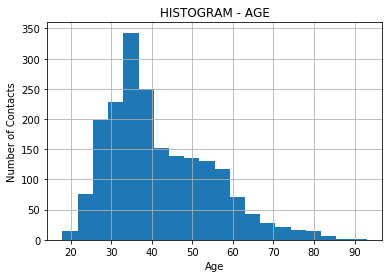

In [59]:
# original histogran 
# histogram for balance 
df['age'].hist(bins=20)
plt.title('HISTOGRAM - AGE')
plt.xlabel('Age')
plt.ylabel('Number of Contacts')
plt.show()



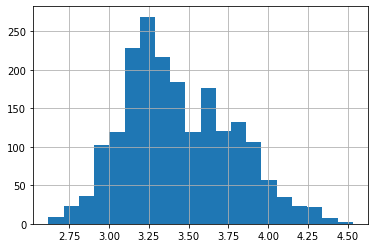

In [60]:
# cube root transformation

np.cbrt(df['age']).hist(bins=20)
plt.show()

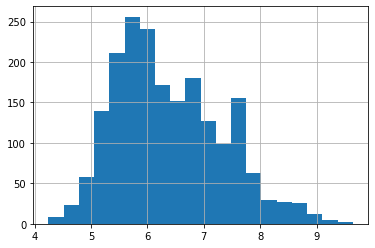

In [61]:
# square root transformation

np.sqrt(df['age']).hist(bins=20)
plt.show()

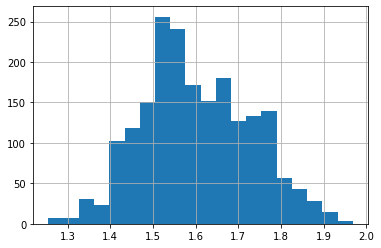

In [62]:
# log base 10 transformation
np.log10(df['age']).hist(bins=20)
plt.show()

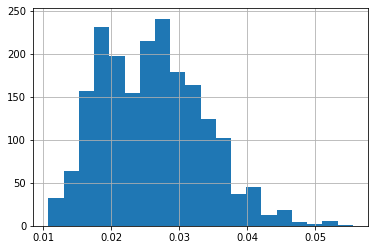

In [63]:
# Reciprocal transformation
np.reciprocal(df['age']).hist(bins=20)
plt.show()

# Clustering

## Q11
The k-means clustering algorithm with k=3 discovers

Clusters data by trying to separate samples in 3 groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-square

## Q12
The optimal number of clusters found by k-means clustering algorithm can be determined with the 

* Direct methods: consists of optimizing a criterion, such as the within cluster sums of squares or the average silhouette. The corresponding methods are named elbow and silhouette methods, respectively.

* Statistical testing methods: consists of comparing evidence against null hypothesis. An example is the gap statistic.


## Q13

_____________ involves calculating the mean distance between a data point and all other points in the same cluster

## Q14

_______________ is an approach to non-linear dimensionality reduction.

Ans: Manifold learning 

## Q15

Manifold learning methods benefit from  _______________ being used for all features because they are based ib a nearest -neighbour search and my perform poorly otherwise.

Ans: rescaling